# __Supervised Learning: Classification__

# __Naive Bayes Classifier__

Naive Bayes is a probabilistic classifier based on Bayes' Theorem. Naive Bayes is called naive because it assumes that the input variables are independent of each other. This is a strong assumption and unrealistic for real data.

- It is particularly suited for large datasets and is widely used for binary and multi-class classification tasks.
- It is widely used for text classification, sentiment analysis, etc.
- The Naive Bayes classifier computes the probability of a class given the input features by multiplying the individual conditional probabilities of each feature.
- Conditional probabilities represent the probability of an event given some other event has occurred.
- Internally, many Naive Bayes implementations use logarithms to prevent numerical underflow when multiplying many small probabilities. The extreme values observed might be a result of the conversion back from logarithmic space to probability space.
- __Laplace Smoothing__ adds a small constant to the numerator and denominator when calculating probabilities to prevent zero probabilities when a feature has not been observed in a specific class.
-  Naive Bayes performs well on small datasets and assumes that features are independent, making it suitable for such scenarios.

### __Mathematical Concept of Naive Bayes:__

#### __Bayes' Theorem:__

Naive Bayes relies on Bayes' Theorem, which states

$$ P(y|X) = \frac{P(X|y) \times P(y)}{P(X)} $$

Where
- $ P(y|X) $ : Posterior probability, probability of class y given features X
- $ P(y) $ : Prior probability of y prior to seeing the evidence
- $ P(X|y) $ : Likelihood probability, probability of features X given y
- $ P(X) $ : Marginal likelihood or evidence, sometimes also referred to as normalization constant


- The prior probability is the initial probability of an event before it is contextualized under a certain condition, or the marginal probability.
-  The posterior probability is the probability of an event after observing a piece of data.
-  In Bayes' theorem, the probability of a hypothesis given new evidence is called the posterior. The likelihood is the probability of the evidence given that the hypothesis is true. The term prior refers to the initial probability of the hypothesis before considering any new evidence.
- **Bayes' theorem:** It calculates the probability of an event occurring, given that another event has already taken place.

Naïve Bayes is part of a family of generative learning algorithms, meaning that it seeks to model the distribution of inputs of a given class or category. Unlike discriminative classifiers, like logistic regression, it does not learn which features are most important to differentiate between classes.



#### __Another definition of Bayes' Theorem__

Bayes' Theorem describes how to update the probability of a hypothesis when new evidence is obtained. It essentially allows us to refine our belief in a hypothesis based on the likelihood of the observed evidence under that hypothesis and the prior probability of the hypothesis. 

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTSE26MUW-nu8mBDxv6cyVPMOy7DxcQQcc9Q0FaI5J5cbzgi4d8iLAKUzhaJzktob98dg&usqp=CAU" width=500 />

- __Hypothesis (H):__ A statement or proposition that can be tested or investigated. 
- __Evidence (E):__ Information or data that can be used to evaluate the hypothesis. 
- __Prior Probability (P(H)):__ The probability of the hypothesis being true before considering any new evidence. 
- __Likelihood (P(E|H)):__ The probability of observing the given evidence, assuming the hypothesis is true. 
- __Posterior Probability (P(H|E)):__ The probability of the hypothesis being true given the observed evidence. 

The normalization constant is the same for all posterior probability calculations for a given piece of evidence. When comparing which posterior probability is larger, we only need to compare the numerators )of Bayes' theorem. The normalization constant doesn't change the ordering of these probabilities; it only scales them so that their sum is 1.

#### __Types of Naive Bayes Model__

- __Gaussian Naïve Bayes (GaussianNB):__ This is a variant which is used with Gaussian distributions — i.e. normal distributions—and continuous variables. This model is fitted by finding the mean and standard deviation of each class.

- __Multinomial Naïve Bayes (MultinomialNB):__ It assumes that the features are from multinomial distributions. This variant is useful when using discrete data, such as frequency counts, and it is typically applied within natural language processing use cases, like spam or text classification. It performs well when the dataset is balanced, however for Imbalanced datasets, __Complement Naïve Bayes__ performs better.

- __Bernoulli Naïve Bayes (BernoulliNB):__ It is used with Boolean variables, such as True and False or 1 and 0.

#### __Advantages of Naive Bayes Classifier__

- __Less complex:__ Compared to other classifiers, Naïve Bayes is considered a simpler classifier since the parameters are easier to estimate.
- __Scales well:__ Compared to logistic regression, Naïve Bayes is considered a fast and efficient classifier that is fairly accurate when the conditional independence assumption holds. It also has low storage requirements.
- __Can handle high-dimensional data:__ Use cases, such document classification, can have a high number of dimensions, which can be difficult for other classifiers to manage.

#### __Disadvantages of Naive Bayes Classifier__

- __Subject to Zero frequency:__ Zero frequency occurs when a categorical variable does not exist within the training set. For example, imagine that we’re trying to find the maximum likelihood estimator for the word, “sir” given class “spam”, but the word, “sir” doesn’t exist in the training data. The probability in this case would zero, and since this classifier multiplies all the conditional probabilities together, this also means that posterior probability will be zero. To avoid this issue, __laplace smoothing__ can be leveraged.
- __Unrealistic core assumption:__ While the conditional independence assumption overall performs well, the assumption does not always hold, leading to incorrect classifications.

#### __Applications of the Naïve Bayes classifier__

- __Spam filtering:__ Spam classification is one of the most popular applications of Naïve Bayes. 
- __Text classification:__ Used in sentiment analysis, document categorization, and topic classification.
- __Medical Diagnosis:__ Helps in predicting the likelihood of a disease based on symptoms.
- __Credit Scoring:__ Evaluates creditworthiness of individuals for loan approval.
- __Weather Prediction:__ Classifies weather conditions based on various factors.

## __1. The YouTube dataset__

#### __Import the necessary libraries__

In [546]:
import numpy as np
import pandas as pd
import glob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

In [547]:
files = glob.glob('datasets/youtube-dataset//*.csv')
files

['datasets/youtube-dataset/Youtube03.csv',
 'datasets/youtube-dataset/Youtube02.csv',
 'datasets/youtube-dataset/Youtube01.csv',
 'datasets/youtube-dataset/Youtube05.csv',
 'datasets/youtube-dataset/Youtube04.csv']

#### __Pre-processing the dataset__

In [548]:
temp_data = pd.read_csv('datasets/youtube-dataset/Youtube01.csv')
temp_data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013-11-26T02:55:11,"Hey, check out my new website!! This site is a...",1


In [549]:
all_df = []

for i in files:
    all_df.append(pd.read_csv(i).drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis=1))

all_df[0].head()

,CONTENT,CLASS
0,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,wierd but funny﻿,0
2,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,Party Rock....lol...who wants to shuffle!!!﻿,0
4,Party rock﻿,0


In [550]:
df = pd.concat(all_df, axis=0, ignore_index=True)
df

,CONTENT,CLASS
0,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,wierd but funny﻿,0
2,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,Party Rock....lol...who wants to shuffle!!!﻿,0
4,Party rock﻿,0
...,...,...
1950,SUBSCRIBE TO MY CHANNEL X PLEASE!. SPARE,1
1951,Check out my videos guy! :) Hope you guys had ...,1
1952,3 yrs ago I had a health scare but thankfully ...,1
1953,Rihanna looks so beautiful with red hair ;)﻿,0


##### __Observation:__

- `pd.concat` takes 3 arguments, first is the dataframes list which we want to concatenate, axis = 0 means the frames will be concatenated in the horizontal axis, ignore_index=True drops the original indexing and enumerates the samples from 0 to N-1 where N is the total number of samples.

#### __Inspecting the data__

In [551]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CONTENT  1955 non-null   object
 1   CLASS    1955 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 30.7+ KB


In [272]:
missing_values = df.isna().sum()
missing_values

CONTENT    0
CLASS      0
dtype: int64

In [273]:
duplicate_values = df.duplicated().sum()
duplicate_values

196

In [274]:
df['CLASS'].value_counts()

CLASS
1    1004
0     951
Name: count, dtype: int64

##### __Observation:__

- Here, we can observe that the dataset is balanced as both classes are almost equally represented, which is a requirement for Naive Bayes algorithm to work.
- `0` refers to ham messages.
- `1` refers to spam messages.

#### __Computing the count of unique words across several texts using `CountVectorizer`__

##### __Sample 1__

In [371]:
message_sample1 = ['This is a dog']

vectorizer1 = CountVectorizer()
vectorizer_sample1 = vectorizer1.fit_transform(message_sample1)

vectorizer1_df = pd.DataFrame(data=vectorizer_sample1.toarray(), columns=vectorizer1.get_feature_names_out())
vectorizer1_df

,dog,is,this
0,1,1,1


In [372]:
vectorizer1.transform(['This is a cat']).toarray()

array([[0, 1, 1]])

##### __Sample 2__

In [364]:
message_sample2 = ['This is a dog and that is a dog', 'This is a cat']

vectorizer2 = CountVectorizer()
vectorizer_sample2 = vectorizer2.fit_transform(message_sample2)

vectorizer2_df = pd.DataFrame(data=vectorizer_sample2.toarray(), columns=vectorizer2.get_feature_names_out())
vectorizer2_df

,and,cat,dog,is,that,this
0,1,0,2,2,1,1
1,0,1,0,1,0,1


In [366]:
vectorizer2.transform(['Those are birds']).toarray()

array([[0, 0, 0, 0, 0, 0]])

##### __Sample 3__

In [359]:
# Sample text documents
documents = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the documents
vectorized_documents = vectorizer.fit_transform(documents)

# Get the vocabulary
vocabulary = vectorizer.get_feature_names_out()

# Convert the vectorized documents to a dense array
vectorized_array = vectorized_documents.toarray()

vectorized_df = pd.DataFrame(data=vectorized_array, columns=vocabulary)
vectorized_df

,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,2,0,1,0,1,1,0,1
2,1,0,0,1,1,0,1,1,1
3,0,1,1,1,0,0,1,0,1


#### __Perform train-test split__

In [282]:
# Split data into feature(X) and target(y)
X = df['CONTENT']
y = df['CLASS']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

##### __Observation:__

- `stratify` param is added in the `train_test_split` to make sure that equal portions of the two classes are added in the training and testing set.

In [283]:
y_train.value_counts(normalize=True)

CLASS
1    0.513427
0    0.486573
Name: proportion, dtype: float64

In [284]:
y_test.value_counts()

CLASS
1    201
0    190
Name: count, dtype: int64

#### __Tokenizing the YouTube comments__

- Create an instance of `CountVectorizer` class.
- Then create a vocabulary dictionary containing the words from the training dataset.
- Here, we first split the dataset into training and testing and then applied the `fit_transform` method to prevent data leakage from the testing set to the training set.
- In the later code, we will use Sklearn pipeline to automate this process, i.e. preprocessing step before a machine learning model.

In [285]:
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

In [286]:
X_train_transformed.shape

(1564, 3807)

In [287]:
X_test_transformed.shape

(391, 3807)

### __Multinomial Naïve Bayes classifier - The YouTube dataset__

#### __Performing the classification__

- `alpha` is the __smoothing parameter__.

In [320]:
# Define the pipeline
pipeline_nb = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])
pipeline_nb.fit(X_train, y_train)

pipeline_nb.classes_

array([0, 1])

In [321]:
pipeline_nb.get_params()

{'memory': None,
 'steps': [('vectorizer', CountVectorizer()), ('nb', MultinomialNB())],
 'verbose': False,
 'vectorizer': CountVectorizer(),
 'nb': MultinomialNB(),
 'vectorizer__analyzer': 'word',
 'vectorizer__binary': False,
 'vectorizer__decode_error': 'strict',
 'vectorizer__dtype': numpy.int64,
 'vectorizer__encoding': 'utf-8',
 'vectorizer__input': 'content',
 'vectorizer__lowercase': True,
 'vectorizer__max_df': 1.0,
 'vectorizer__max_features': None,
 'vectorizer__min_df': 1,
 'vectorizer__ngram_range': (1, 1),
 'vectorizer__preprocessor': None,
 'vectorizer__stop_words': None,
 'vectorizer__strip_accents': None,
 'vectorizer__token_pattern': '(?u)\\b\\w\\w+\\b',
 'vectorizer__tokenizer': None,
 'vectorizer__vocabulary': None,
 'nb__alpha': 1.0,
 'nb__class_prior': None,
 'nb__fit_prior': True,
 'nb__force_alpha': True}

#### __Evaluate the performance of the model__

In [322]:
# Predict on the training and testing set
y_pred_train_nb = pipeline_nb.predict(X_train)
y_pred_test_nb = pipeline_nb.predict(X_test)

# Predict probabilities on the testing set
y_pred_test_prob_nb = pipeline_nb.predict_proba(X_test).round(3)[:, 1]

results_df_nb = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Probability': y_pred_test_prob_nb,
    'Predicted Label': y_pred_test_nb,
})

# Display the first 5 instances in the result dataframe
results_df_nb.head()

,Actual Label,Predicted Probability,Predicted Label
1149,0,0.065,0
35,0,0.000,0
141,0,0.003,0
1711,1,1.000,1
1552,1,0.821,1


In [323]:
# Calculate the training and testing accuracy
print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train_nb)}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_test_nb)}")

Training Accuracy: 0.9654731457800512
Testing Accuracy: 0.9130434782608695


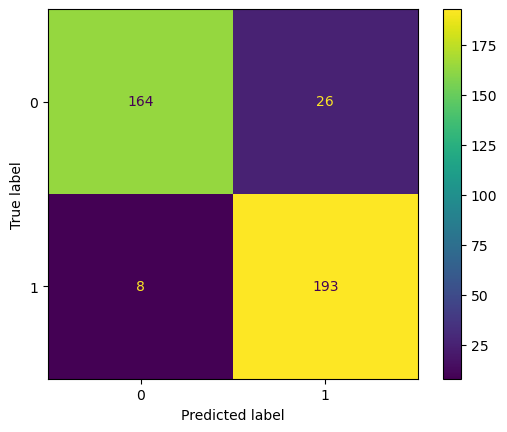

In [324]:
sns.reset_orig()
conf_matrix = confusion_matrix(y_test, y_pred_test_nb)

# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = pipeline_nb.classes_)

# display matrix
cm_display.plot()
plt.show()

In [325]:
print(classification_report(y_test, y_pred_test_nb, target_names=['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.95      0.86      0.91       190
        Spam       0.88      0.96      0.92       201

    accuracy                           0.91       391
   macro avg       0.92      0.91      0.91       391
weighted avg       0.92      0.91      0.91       391



##### __Classification Report:__

1. __Class 0 (`Ham` Class)__
  * _Precision: 0.95_: 95% of the messages are correctly predicted as `Ham` which are indeed ham.
  * _Recall_: 0.86: 86% of the actual `Ham` instances are correctly predicted as ham.
  * _F1-Score: 0.91_: Here, the F1-score for class 0 is 0.91.
  * _Support: 190_: There are 190 actual instances of class 0 in the test set.


2. __Class 1 (`Spam` Class)__
  - _Precision: 0.88_: 88% of the messages are correctly predicted as `Spam` which are indeed spam.
  - _Recall: 0.96_: 96% of the actual `Spam` instances are correctly predicted as spam.
  - _F1-Score: 0.92_: The F1-score for class 1 is 0.92.
  - _Support: 201_: There are 201 actual instances of class 1 in the test set.


#### __Creating probability-distribution figures__

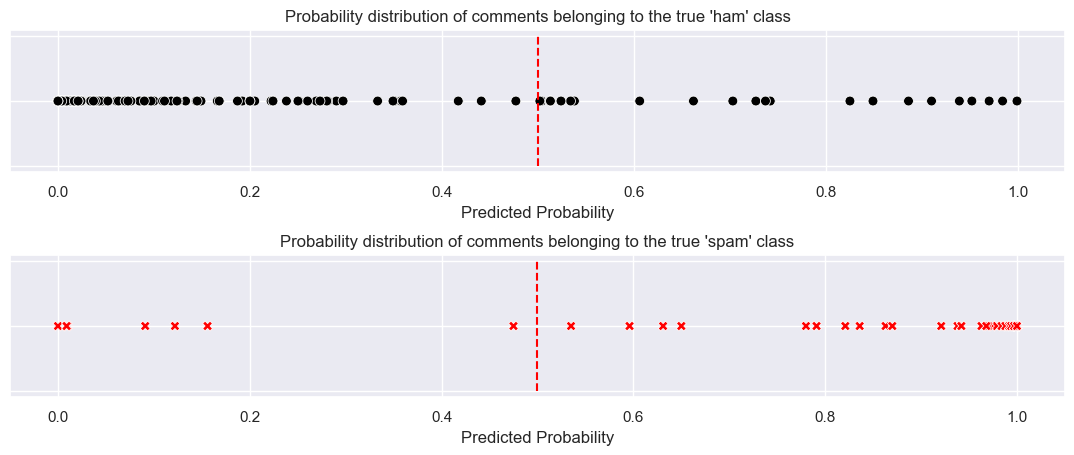

In [326]:
palette_0 = sns.color_palette(['#000000'])
palette_1 = sns.color_palette(['#FF0000'])

df_scatter_0 = results_df_nb[results_df_nb['Actual Label'] == 0].reset_index(drop = True)
df_scatter_1 = results_df_nb[results_df_nb['Actual Label'] == 1].reset_index(drop = True)

sns.set()

fig, (ax1,ax2) = plt.subplots(2,1, figsize=(12,5))
fig.tight_layout(pad = 3)

sns.scatterplot(x = 'Predicted Probability', 
                y = np.zeros(df_scatter_0.shape[0]), 
                data = df_scatter_0,
                hue = 'Actual Label', 
                s = 50,
                markers = ['o'],
                palette = palette_0,
                style = 'Actual Label',
                legend = False, 
                ax = ax1).set(yticklabels=[])

ax1.set_title('Probability distribution of comments belonging to the true \'ham\' class')
ax1.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');

sns.scatterplot(x = 'Predicted Probability', 
                y = np.zeros(df_scatter_1.shape[0]), 
                hue = 'Actual Label', 
                data = df_scatter_1,
                s = 50,
                palette = palette_1,
                markers = ['X'],
                style = 'Actual Label',
                legend = False, 
                ax = ax2).set(yticklabels=[])

ax2.set_title('Probability distribution of comments belonging to the true \'spam\' class')
ax2.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');

##### __Observation:__

- The middle red line is the 50% probability line, X-axis represents the probability of a piece of text belonging to spam class. So, text with a spam probability less than 0.5 would be classified as ham. All rest will be classified as spam.

#### __Improving the performance of the model__

- We can use __Complement Naïve Bayes classifier__ as the classes are a bit imbalanced.
- Or, we can update the `class_prior` param when creating the `MultinomialNB` classifier which are the prior probabilities for both the classes.
- By default, the algorithm calculates these probabilities based on the training data, so the classifier assignes roughly 50% prior for both spam and ham.
- However, we can assume P(ham) > P(spam), so we can assign 60% to ham class and 40% to spam class.

In [347]:
# Default log priors as assigned by the classifier - 48% for the ham class and 51% for the spam class
np.exp(pipeline_nb.named_steps['nb'].class_log_prior_)

array([0.48657289, 0.51342711])

In [329]:
pipeline_nb_new = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB(class_prior = np.array([0.6, 0.4])))
])
pipeline_nb_new.fit(X_train, y_train)

# Predict on the training and testing set
y_pred_train_nb = pipeline_nb_new.predict(X_train)
y_pred_test_nb = pipeline_nb_new.predict(X_test)

# Predict probabilities on the testing set
y_pred_test_prob_nb = pipeline_nb_new.predict_proba(X_test).round(3)[:, 1]

results_df_nb = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Probability': y_pred_test_prob_nb,
    'Predicted Label': y_pred_test_nb,
})

# Calculate the training and testing accuracy
print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train_nb)}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_test_nb)}")

Training Accuracy: 0.9705882352941176
Testing Accuracy: 0.9386189258312021


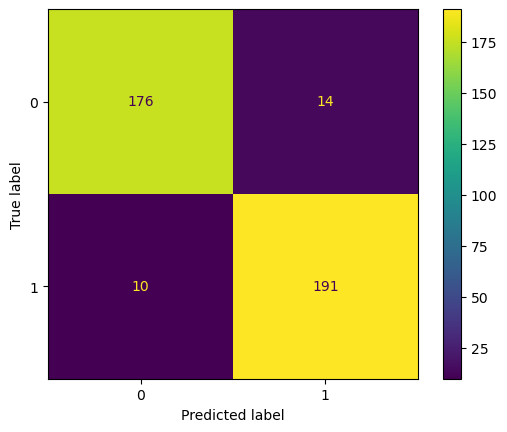

In [330]:
sns.reset_orig()
conf_matrix = confusion_matrix(y_test, y_pred_test_nb)

# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = nb_clf.classes_)

# display matrix
cm_display.plot()
plt.show()

##### __Observation:__

- Here, we can see that the misclassified ham messages (ham -> spam) are reduced from 26 to 14, but misclassified spam messages (spam -> ham) increased from 8 to 10.

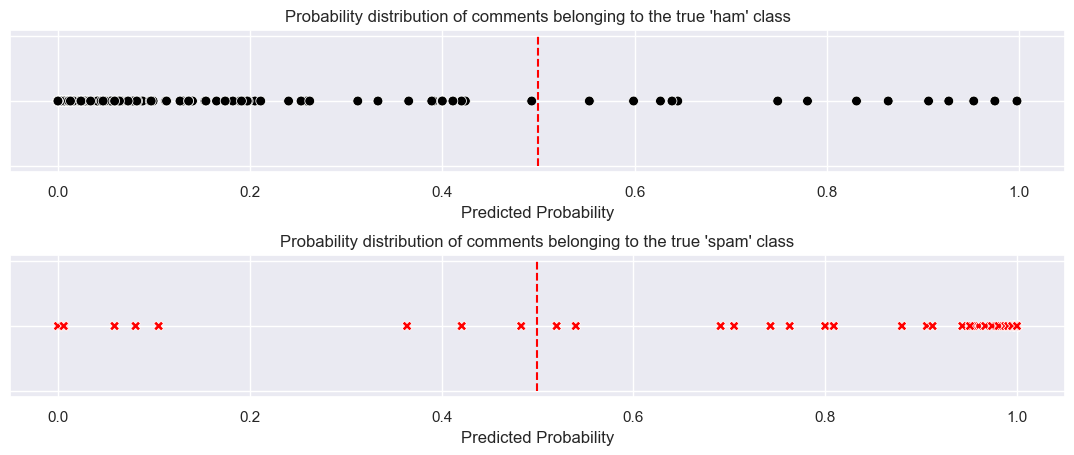

In [331]:
palette_0 = sns.color_palette(['#000000'])
palette_1 = sns.color_palette(['#FF0000'])

df_scatter_0 = results_df_nb[results_df_nb['Actual Label'] == 0].reset_index(drop = True)
df_scatter_1 = results_df_nb[results_df_nb['Actual Label'] == 1].reset_index(drop = True)

sns.set()

fig, (ax1,ax2) = plt.subplots(2,1, figsize=(12,5))
fig.tight_layout(pad = 3)

sns.scatterplot(x = 'Predicted Probability', 
                y = np.zeros(df_scatter_0.shape[0]), 
                data = df_scatter_0,
                hue = 'Actual Label', 
                s = 50,
                markers = ['o'],
                palette = palette_0,
                style = 'Actual Label',
                legend = False, 
                ax = ax1).set(yticklabels=[])

ax1.set_title('Probability distribution of comments belonging to the true \'ham\' class')
ax1.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');

sns.scatterplot(x = 'Predicted Probability', 
                y = np.zeros(df_scatter_1.shape[0]), 
                hue = 'Actual Label', 
                data = df_scatter_1,
                s = 50,
                palette = palette_1,
                markers = ['X'],
                style = 'Actual Label',
                legend = False, 
                ax = ax2).set(yticklabels=[])

ax2.set_title('Probability distribution of comments belonging to the true \'spam\' class')
ax2.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');

##### __Observation:__

- We can see the no. of ham messages classified as spam has been reduced.

#### __Making predictions__

In [343]:
# Creating a sparse matrix of new comments which we want the model to predict
predict_data = vectorizer.transform([
    'This song is amazing!', 
    'Hello, how are you?',
    'You can win 1m dollars right now, just click here!!!', 
    'Please click this link to win a thousand dollars!!!!!'
])

In [344]:
pipeline_nb.named_steps['nb'].predict(predict_data)

array([0, 0, 1, 1])

In [345]:
pipeline_nb_new.named_steps['nb'].predict(predict_data)

array([0, 0, 1, 1])

#### __Conclusion__

- The model performs well when classifiying messages, but the probabilities are spread out.
- So, the model is not steadfast when making predictions.
- __NB classifiers, in general are good predictors, but rather bad estimators.__

## __2. The Personality model dataset__

Simone is a novice machine learning engineer at Tink - a promising start-up company, set to become the next biggest social media platform. Her manager has given her the responsibility of training an algorithm with a personality model of the people using the platform according to the Myers-Briggs Type Indicator. In its entirety, this indicator separates people into 16 categories. For now, Tink concentrates on only 4 of them, namely:
- Introversion, Intuition, Feeling, Perceiving (INFP)
- Introversion, Intuition, Feeling, Judging (INFJ)
- Introversion, Intuition, Thinking, Perceiving (INTP)
- Introversion, Intuition, Thinking, Judging (INTJ)

Write a machine learning algorithm that determines the personality type of Tink's users.

#### __Import the necessary libraries__

In [385]:
import numpy as np
import pandas as pd
import glob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

#### __Pre-processing the dataset__

In [350]:
data_df = pd.read_csv('datasets/tink.csv')
data_df.head()

,CLASS,CONTENT
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,INTP,'Good one _____ https://www.youtube.com/wat...
2,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
3,INTJ,'18/37 @.@|||Science is not perfect. No scien...
4,INFJ,"'No, I can't draw on my own nails (haha). Thos..."


#### __Inspecting the data__

In [351]:
missing_values = data_df.isna().sum()
missing_values

CLASS      0
CONTENT    0
dtype: int64

In [352]:
duplicate_values = data_df.duplicated().sum()
duplicate_values

0

In [353]:
data_df['CLASS'].value_counts()

CLASS
INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
Name: count, dtype: int64

##### __Observation:__

- Here, we can observe that the dataset is imbalanced as the classes are not equally represented, which is a requirement for Naive Bayes algorithm to work.
- So, here we will use Complement Naive Bayes algorithm.

#### __Perform train-test split__

In [374]:
# Split data into feature(X) and target(y)
X = data_df['CONTENT']
y = data_df['CLASS']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### __Complement Naïve Bayes classifier - The personality model dataset__

#### __Performing the classification__

In [386]:
# Define the pipeline
pipeline_nb = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', ComplementNB())
])
pipeline_nb.fit(X_train, y_train)

pipeline_nb.classes_

array(['INFJ', 'INFP', 'INTJ', 'INTP'], dtype='<U4')

#### __Evaluate the performance of the model__

In [387]:
# Predict on the training and testing set
y_pred_train_nb = pipeline_nb.predict(X_train)
y_pred_test_nb = pipeline_nb.predict(X_test)

# Predict probabilities on the testing set
y_pred_test_prob_nb = pipeline_nb.predict_proba(X_test).round(3)[:, 1]

results_df_nb = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Probability': y_pred_test_prob_nb,
    'Predicted Label': y_pred_test_nb,
})

# Display the first 5 instances in the result dataframe
results_df_nb.head()

,Actual Label,Predicted Probability,Predicted Label
619,INFP,1.000,INFP
4775,INFP,0.036,INTP
1881,INTJ,0.416,INTP
1632,INFJ,0.951,INFP
4593,INFJ,0.000,INFJ


In [388]:
# Calculate the training and testing accuracy
print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train_nb)}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_test_nb)}")

Training Accuracy: 0.9831029185867896
Testing Accuracy: 0.6824561403508772


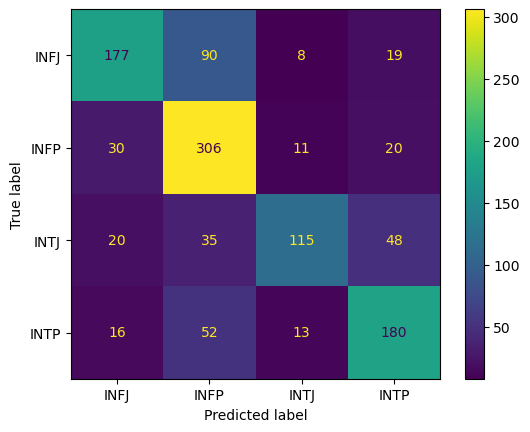

In [389]:
sns.reset_orig()
conf_matrix = confusion_matrix(y_test, y_pred_test_nb)

# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = pipeline_nb.classes_)

# display matrix
cm_display.plot()
plt.show()

In [390]:
print(classification_report(y_test, y_pred_test_nb, target_names = pipeline_nb.classes_))

              precision    recall  f1-score   support

        INFJ       0.73      0.60      0.66       294
        INFP       0.63      0.83      0.72       367
        INTJ       0.78      0.53      0.63       218
        INTP       0.67      0.69      0.68       261

    accuracy                           0.68      1140
   macro avg       0.70      0.66      0.67      1140
weighted avg       0.70      0.68      0.68      1140



#### __Making predictions__

In [394]:
# Creating a sparse matrix of new comments which we want the model to predict
predict_data = pipeline_nb.named_steps['vectorizer'].transform(['Such feelings are not surprising, you are allowed to be crossed.'])

In [395]:
pipeline_nb.named_steps['nb'].predict(predict_data)

array(['INFJ'], dtype='<U4')

#### __Conclusion:__

- Here, we can see that the model is overfitting to the training data.

## __3. Sentiment Analysis dataset__

Alissa is a senior data scientist at Chirper- a platform where users communicate by uploading posts on various topics on the platform.
Very frequently, users express their excitement over a great song, an upcoming movie, or a breakthrough in science. However, sometimes users feel displeased, angry, or disappointed.

The task is to train a model that categorizes new posts as either positive or negative. They would later use the results to create an overall assessment of users' sentiment within the platform.

The database contains the following columns:
- Target: the sentiment of the post. `O` refers to a caw (a negative post), while `1` refers to a chirp (a positive post)
- IDS: the ID of the post
- Date: the date of the post
- Flag: the query
- User: the owner of the post
- Text: the text of the post

#### __Pre-processing the dataset__

In [425]:
data = pd.read_csv('datasets/chirper.csv')
data

,Target,IDS,Date,Flag,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
9995,1,1469502873,Tue Apr 07 06:34:42 PDT 2009,NO_QUERY,dean4ladygaga,@alexandramusic Morning Alexandra lol cant wai...
9996,1,1469502879,Tue Apr 07 06:34:43 PDT 2009,NO_QUERY,michaelewiggam,@christinastrain When I get closer to finalize...
9997,1,1469502890,Tue Apr 07 06:34:43 PDT 2009,NO_QUERY,Monicarrrr,@nashmeg http://i44.tinypic.com/j5fl34.jpg the...
9998,1,1469502944,Tue Apr 07 06:34:43 PDT 2009,NO_QUERY,leesweekeat,(and HR) have painstakingly made the huge sacr...


#### __Inspecting the data__

In [426]:
missing_values = data.isna().sum()
missing_values

Target    0
IDS       0
Date      0
Flag      0
User      0
Text      0
dtype: int64

In [427]:
duplicate_values = data.duplicated().sum()
duplicate_values

0

In [428]:
data['Target'].value_counts()

Target
1    9500
0     500
Name: count, dtype: int64

##### __Observation:__

- Here, we can observe that the dataset is highly imbalanced as the classes are not equally represented, which is a requirement for Naive Bayes algorithm to work.
- So, here we will use Complement Naive Bayes algorithm.

#### __Perform train-test split__

In [443]:
# Split data into feature(X) and target(y)
X = data['Text']
y = data['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [444]:
y_train.value_counts()

Target
1    7600
0     400
Name: count, dtype: int64

In [445]:
y_test.value_counts()

Target
1    1900
0     100
Name: count, dtype: int64

### __Complement Naïve Bayes classifier - Sentiment Analysis dataset__

#### __Performing the classification__

In [446]:
# Define the pipeline
pipeline_nb = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', ComplementNB())
])
pipeline_nb.fit(X_train, y_train)

pipeline_nb.classes_

array([0, 1])

#### __Evaluate the performance of the model__

In [447]:
# Predict on the training and testing set
y_pred_train_nb = pipeline_nb.predict(X_train)
y_pred_test_nb = pipeline_nb.predict(X_test)

# Predict probabilities on the testing set
y_pred_test_prob_nb = pipeline_nb.predict_proba(X_test).round(3)[:, 1]

# Calculate the training and testing accuracy
print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train_nb)}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_test_nb)}")

Training Accuracy: 0.931125
Testing Accuracy: 0.932


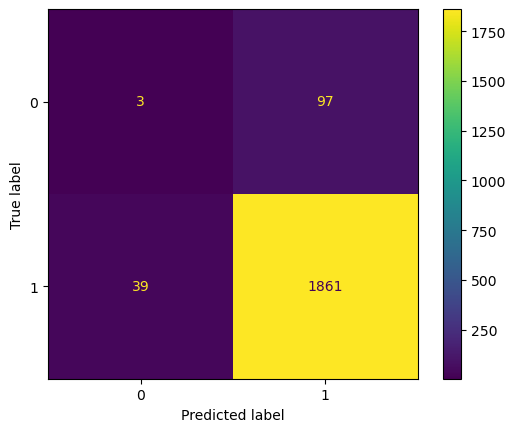

In [448]:
sns.reset_orig()
conf_matrix = confusion_matrix(y_test, y_pred_test_nb)

# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = pipeline_nb.classes_)

# display matrix
cm_display.plot()
plt.show()

In [450]:
print(classification_report(y_test, y_pred_test_nb, zero_division=True, target_names=['caws', 'chirps']))

              precision    recall  f1-score   support

        caws       0.07      0.03      0.04       100
      chirps       0.95      0.98      0.96      1900

    accuracy                           0.93      2000
   macro avg       0.51      0.50      0.50      2000
weighted avg       0.91      0.93      0.92      2000



#### __Making predictions__

In [459]:
# Creating a sparse matrix of new comments which we want the model to predict
predict_data = pipeline_nb.named_steps['vectorizer'].transform([
    'my whole body feels itchy and like its on fire', 
    'I am feeling very very sad!!', 
    'I am Happy!!!!',
    'I am happy and sad!'
])

In [460]:
pipeline_nb.named_steps['nb'].predict(predict_data)

array([1, 1, 1, 1])

#### __Conclusion:__

- Here, the predictions for the negative posts are incorrect and the model is not working as expected.

# __K-Nearest Neighbors (KNN)__

The K-Nearest Neighbor (KNN) algorithm is a non-parametric, supervised learning classifier used for classification and regression tasks. It relies on the idea that similar data points tend to have similar labels or values. So, it uses proximity to make classifications or predictions about the grouping of an individual data point. 

- It works by finding the "k" closest data points (neighbors) to a given input and makes a predictions based on the majority class (for classification) or the average value (for regression).
- For classification problems, a class label is assigned on the basis of a majority vote — i.e. the label that is most frequently represented around a given data point is used.
- Regression problems use a similar concept as classification problem, but in this case, the average of the k nearest neighbors is taken to make a prediction about a classification.
- The main distinction here is that classification is used for discrete values, whereas regression is used with continuous ones.
- KNN is a lazy learner, meaning that it only stores a training dataset versus undergoing a training stage.This also means that all the computation occurs when a classification or prediction is being made.
- Since it heavily relies on memory to store all its training data, it is also referred to as an __instance-based or memory-based learning method__.
- During the training phase, the KNN algorithm retains the entire training dataset as a reference.
- For predictions, it computes the distance between the input data point and all training examples using a selected distance metric, such as Euclidean distance (default).

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20231207103856/KNN-Algorithm-(1).png" width = 700 height = 700 />

### __Distance Metrics used in KNN algorithm__

#### __Euclidean distance (p=2):__

Most commonly used distance measure, and it is limited to real-valued vectors. It measures a straight line between the query point and the other point being measured.

<img src="https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/3c/fb/EuclideanDistance.png" width=400 />

#### __Manhattan distance (p=1):__

Another popular distance metric, which measures the absolute value between two points. It is also referred to as __taxicab distance or city block distance__ as it is commonly visualized with a grid, illustrating how one might navigate from one address to another via city streets.

<img src="https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/26/80/ManhattanDistance.png" width=400 />

#### __Minkowski distance:__

This distance measure is the generalized form of Euclidean and Manhattan distance metrics. The parameter, p, in the formula below, allows for the creation of other distance metrics. Euclidean distance is represented by this formula when p is equal to two, and Manhattan distance is denoted with p equal to one.

<img src="https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/9e/a8/MinkowskiDistance.png" width=400 />

#### __Cosine distance:__

It can be used as a distance metric. Cosine distance is equal to `1 - Cosine similarity`. __Cosine Similarity__ is the cosine of the vectors of each of our features in comparison to that of our new datapoint. It is commonly used in sparse datasets and with text data.

$$1 - \text{cos}(\theta) = 1 - \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\| \|\mathbf{B}\|}$$

Where,
- ${\mathbf{A}}$ and ${\mathbf{B}}$ are the vectors being compared,
- $\mathbf{A} \cdot \mathbf{B}$ is the dot product of the vectors,
- ${\|\mathbf{A}\|}$ and ${\|\mathbf{B}\|}$ are the magnitude of the vectors, and
- $\theta$ is the angle between the vectors

#### __Hamming distance:__

This technique is used typically used with Boolean or string vectors, identifying the points where the vectors do not match. As a result, it has also been referred to as the overlap metric. 

<img src="https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/43/3a/HammingDistance.png" width=400 />

#### __The following is a step-by-step approach to KNN algorithm:__

**Step 1:** Load the training and test data.

**Step 2:** Choose the value of K, which represents the number of nearest neighbors to consider. (K can be any positive integer)

**Note:** The optimal value for K will depend on the specific dataset and the problem being solved. It's often determined through cross-validation.

**Step 3:** For every point in the test data, do the following:
- Calculate the distance between the test data point and each point in the training dataset using a distance metric such as Euclidean, Manhattan, or Hamming distance.
- Sort the calculated distances in ascending order.
- Select the top K closest data points (smallest distances) from the sorted list.
- Assign the most frequent class (mode) among these K nearest neighbors to the test data point.

### __Hyperparameter Tuning in KNN:__

- The number of Neighbors (`k`) is a crucial hyperparameter in the K-Nearest Neighbors (KNN) algorithm.
- It specifies how many nearest neighbors the algorithm should consider when making predictions.
- The selection of 𝑘 impacts the model's ability to generalize effectively: a smaller 𝑘 can make the model sensitive to noise in the data, potentially leading to overfitting, while a larger 𝑘 might include less relevant neighbors, possibly causing underfitting.
- Therefore, choosing the right 𝑘 value is essential for balancing bias and variance in the model.
- Overall, it is recommended to have an odd number for `k` to avoid ties in classification, and cross-validation tactics can help choose the optimal k.

#### __Applications of KNN__

- __Data preprocessing:__ Datasets frequently have missing values, but the KNN algorithm can estimate for those values in a process known as missing data imputation.
- __Recommendation Engines:__ Using clickstream data from websites, the KNN algorithm has been used to provide automatic recommendations to users on additional content. However, given the scaling issues with KNN, this approach may not be optimal for larger datasets.
- __Finance:__ It has also been used in a variety of finance and economic use cases. It is used to determine the credit-worthiness of a loan applicant.
- __Healthcare:__ KNN has also had application within the healthcare industry, making predictions on the risk of heart attacks and prostate cancer. The algorithm works by calculating the most likely gene expressions.
- __Pattern Recognition:__ KNN has also assisted in identifying patterns, such as in text and digit classification. This has been particularly helpful in identifying handwritten numbers that you might find on forms or mailing envelopes.

#### __Advantages of the KNN algorithm__

- __Easy to implement:__ Given the algorithm’s simplicity and accuracy, it is one of the first classifiers that a new data scientist will learn.
- __Adapts easily:__ As new training samples are added, the algorithm adjusts to account for any new data since all training data is stored into memory.
- __Few hyperparameters:__ KNN only requires a k value and a distance metric, which is low when compared to other machine learning algorithms.

#### __Disadvantages of the KNN algorithm__

- __Does not scale well:__ Since KNN is a lazy algorithm, it takes up more memory and data storage compared to other classifiers. While different data structures, such as Ball-Tree, have been created to address the computational inefficiencies, a different classifier may be ideal depending on the business problem.
- __Curse of dimensionality:__ The KNN algorithm tends to fall victim to the curse of dimensionality, which means that it doesn’t perform well with high-dimensional data inputs. This is sometimes also referred to as the peaking phenomenon, where after the algorithm attains the optimal number of features, additional features increases the amount of classification errors, especially when the sample size is smaller.
- __Prone to overfitting:__ Due to the “curse of dimensionality”, KNN is also more prone to overfitting. While feature selection and dimensionality reduction techniques are leveraged to prevent this from occurring, the value of k can also impact the model’s behavior. Lower values of k can overfit the data, whereas higher values of k tend to “smooth out” the prediction values since it is averaging the values over a greater area, or neighborhood. However, if the value of k is too high, then it can underfit the data.

## __The Random dataset (Classification problem)__

#### __Import the necessary libraries__

In [461]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs, make_classification
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

##### __Notes:__

- `make_blobs` generates normally distributed points around a specified center. The function returns 2 arrays, the first one stores the samples with their coordinates and the second one stores the labels.

#### __Generate a synthetic dataset__

In [462]:
X, y = make_blobs(n_samples = 1000,
                  centers = [(-3,3),(0,0),(2,2)],
                  random_state = 365)

In [463]:
X.shape, y.shape

((1000, 2), (1000,))

In [464]:
data = pd.DataFrame(data = X, columns=['Feature 1', 'Feature 2'])
data['Target'] = y
data.head()

,Feature 1,Feature 2,Target
0,1.630460,2.094029,2
1,-2.811252,3.852241,0
2,0.501051,1.582531,2
3,-3.624112,3.325318,0
4,-3.278106,2.359416,0


#### __Perform train-test split__

In [465]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365, stratify=y)

#### __Plotting the dataset__

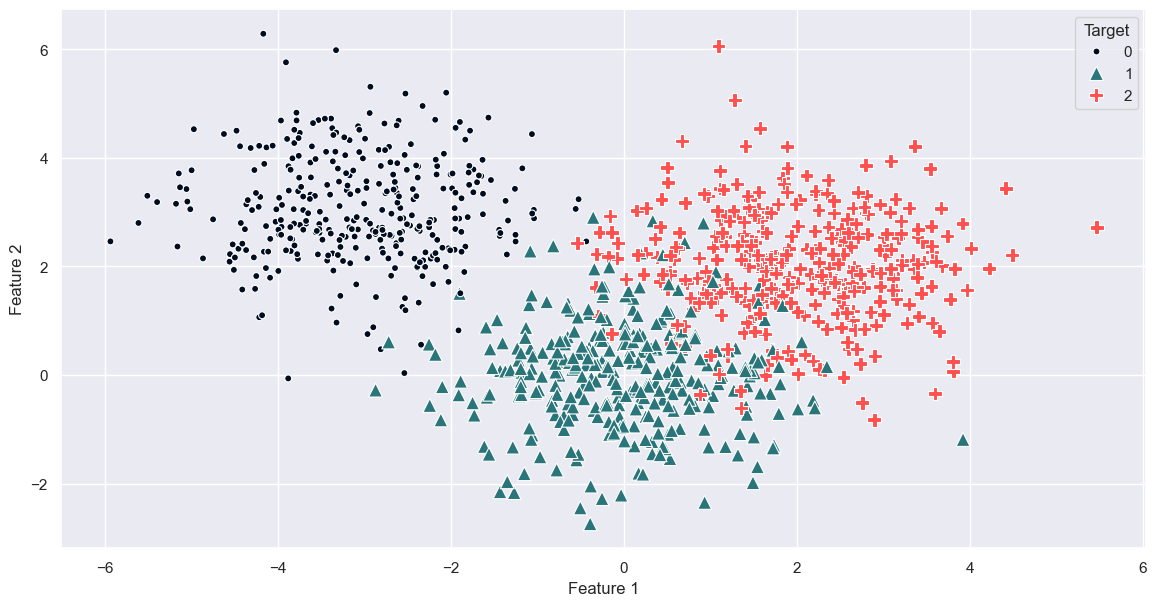

In [473]:
sns.set()

plt.figure(figsize=(14, 7))
knn_palette = sns.color_palette(['#000C1F', '#29757A', '#FF5050'])
sns.scatterplot(x = 'Feature 1', 
                y = 'Feature 2', 
                data = data, 
                hue = 'Target', 
                palette = knn_palette,
                markers = ['.', '^', 'P'],
                style = 'Target', s = 100)
plt.show()

#### __Visualizing the distributions of the points__

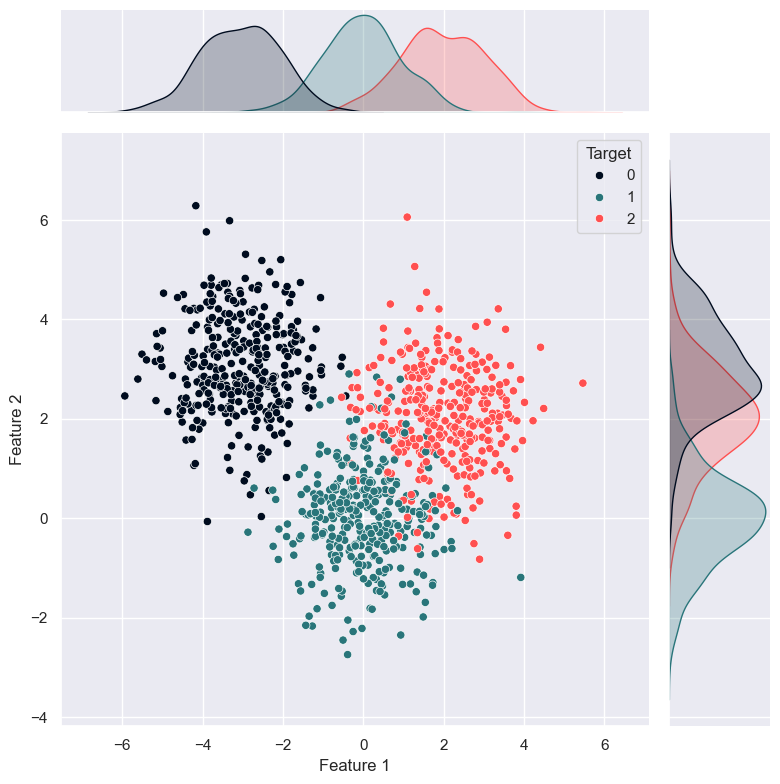

In [474]:
sns.set()

sns.jointplot(x = 'Feature 1', 
              y = 'Feature 2', 
              data = data, 
              hue = 'Target', 
              palette = knn_palette,
              height=8)
plt.show()

### __K-Nearest Neighbours classifier - The Random dataset__

#### __Performing the classification and evaluate performance of the model__

In [468]:
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),                # Standardize the data
    ('knn', KNeighborsClassifier(n_neighbors=5)) # KNN classifier
])

pipeline_knn.fit(X_train, y_train)

# Predict on the training and testing set
y_pred_train_knn = pipeline_knn.predict(X_train)
y_pred_test_knn = pipeline_knn.predict(X_test)

y_pred_prob_knn = pipeline_knn.predict_proba(X_test)[:, 1]

results_df_knn = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Probability': y_pred_prob_knn,
    'Predicted Label': y_pred_test_knn
})

# Calculate training and testing accuracy
training_accuracy = accuracy_score(y_train, y_pred_train_knn)
testing_accuracy = accuracy_score(y_test, y_pred_test_knn)
print("K-Nearest Neighbors (KNN):")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

K-Nearest Neighbors (KNN):
Training Accuracy: 0.95
Testing Accuracy: 0.94


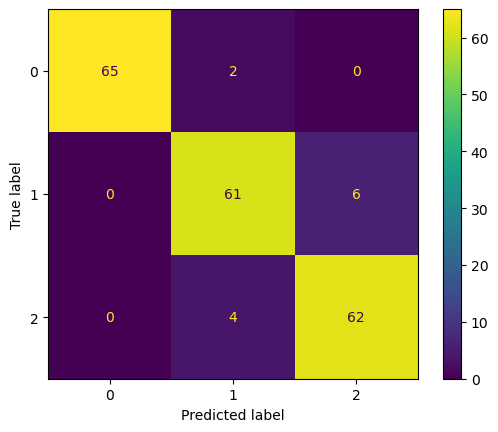

In [469]:
sns.reset_orig()

# Print confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_test_knn)

# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_knn, display_labels = pipeline_knn.classes_)
# display matrix
cm_display.plot()
plt.show()

#### __Using GridSearchCV with Cross-Validation to find optimal `k`:__

In [470]:
# Define the parameter grid
param_grid = {
    'knn__n_neighbors': np.arange(1, 21),
    # 'knn__weights': ['uniform', 'distance']    # optimal weights is coming as 'uniform', but not able to visualize the plot later as it becomes 3D.
}

# Create a pipeline with a scaler and KNN classifier
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),    # Standardize the data
    ('knn', KNeighborsClassifier())  # KNN classifier
])

# Initialize GridSearchCV
grid_search_knn = GridSearchCV(estimator=pipeline_knn, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit GridSearchCV to the data
grid_search_knn.fit(X_train, y_train)

# Get the best k value
best_params_knn = grid_search_knn.best_params_
print(f"The optimal number of neighbors is {best_params_knn}")

# Getting the best estimator
best_knn = grid_search_knn.best_estimator_

# Predict on the training and testing set
y_pred_train_knn_cv = best_knn.predict(X_train)
y_pred_test_knn_cv = best_knn.predict(X_test)
y_pred_test_proba_knn_cv = best_knn.predict_proba(X_test)[:, 1]

# Calculate the training and testing accuracy
training_accuracy = accuracy_score(y_train, y_pred_train_knn_cv)
testing_accuracy = accuracy_score(y_test, y_pred_test_knn_cv)
print("\nK-Nearest Neighbors (KNN):")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

The optimal number of neighbors is {'knn__n_neighbors': 8}

K-Nearest Neighbors (KNN):
Training Accuracy: 0.94875
Testing Accuracy: 0.96


The best cross-validated accuracy is 0.9487499999999999



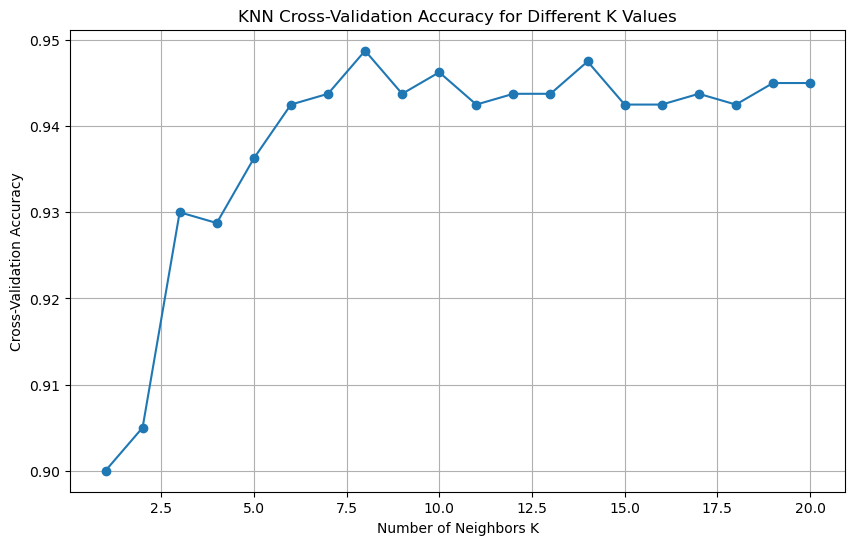

In [471]:
# Get the best score
best_score = grid_search_knn.best_score_
print(f"The best cross-validated accuracy is {best_score}\n")

# Get the cross-validation results
cv_results = grid_search_knn.cv_results_

# Plot the cross-validation accuracy for different k values
plt.figure(figsize=(10, 6))
plt.plot(param_grid['knn__n_neighbors'], cv_results['mean_test_score'], marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN Cross-Validation Accuracy for Different K Values')
plt.grid(True)
plt.show()

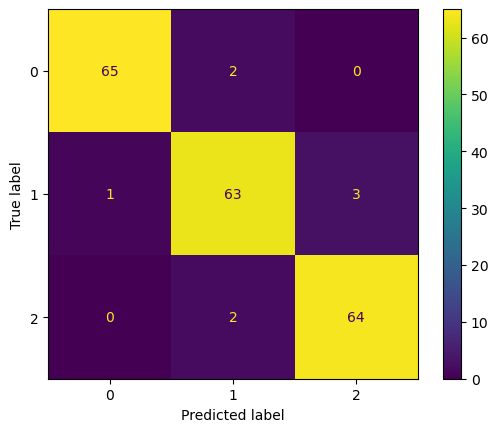

In [472]:
sns.reset_orig()

# Print confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_test_knn_cv)

# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_knn, display_labels = grid_search_knn.classes_)
# display matrix
cm_display.plot()
plt.show()

## __The Random dataset (Regression problem)__

- Draw random data points from a linear regression with a single feature and single output.

#### __Difference between Parametric and Non-parametric approaches__

- Parametric approach refers to algorithms that make strong assumptions about form of the data, e.g. Linear Regression which assumes a linear relationship between the independent and dependent variables. It is restrictive and not suitable on many occasions.
- Non-Parametric approach refers to algorithms that dont make assumptions about form of the data, e.g. KNN. It is adaptable to the data.

#### __Import the necessary libraries__

In [511]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score

#### __Generate a synthetic dataset__

In [512]:
X, y = make_regression(n_samples=300,
                       n_features=1,
                       noise=15, random_state=365)

##### __Notes:__

- We have added a `noise` parameter that will make the data points deviate from their true linear regression, i.e. introduce noise in the linear data.

In [513]:
X.shape, y.shape

((300, 1), (300,))

#### __Perform train-test split__

In [514]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365)

#### __Visualize the training and test databasets__

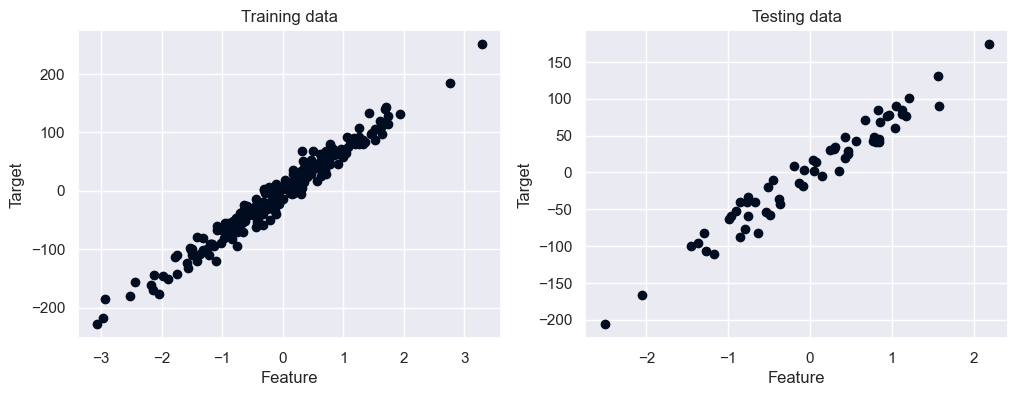

In [519]:
sns.set()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.scatter(X_train, y_train, color='#000C1F')
ax1.set_title('Training data')
ax1.set_xlabel('Feature')
ax1.set_ylabel('Target')

ax2.scatter(X_test, y_test, color='#000C1F')
ax2.set_title('Testing data')
ax2.set_xlabel('Feature')
ax2.set_ylabel('Target')

plt.show()

### __KNN Regression vs Linear Regression - The Random Dataset__

- Fit a KNN Regression model and Linear Regression model to the data.

#### __Performing the classification and evaluate performance of the models__

- Since this is a regression problem, we wil use `mean_squared_error` and `r2_score` to determine model performance.

In [535]:
pipeline_lin_reg = Pipeline([
    ('regressor', LinearRegression())
])

pipeline_lin_reg.fit(X_train, y_train)

# Predict on the training and testing set
y_pred_train_lin_reg = pipeline_lin_reg.predict(X_train)
y_pred_test_lin_reg = pipeline_lin_reg.predict(X_test)

# Evaluate the model on the training and testing set
print("Linear Regression:")
print("Training Set Mean Squared Error:", mean_squared_error(y_train, y_pred_train_lin_reg))
print("Training Set R² Score:", r2_score(y_train, y_pred_train_lin_reg))
print("Test Set Mean Squared Error:", mean_squared_error(y_test, y_pred_test_lin_reg))
print("Test Set R² Score:", r2_score(y_test, y_pred_test_lin_reg))

Linear Regression:
Training Set Mean Squared Error: 192.04369089396707
Training Set R² Score: 0.9654227317447222
Test Set Mean Squared Error: 242.27534813626218
Test Set R² Score: 0.9540074135953244


In [544]:
pipeline_knn_reg = Pipeline([
    ('knn', KNeighborsRegressor(n_neighbors=5)) # KNN classifier
])

pipeline_knn_reg.fit(X_train, y_train)

# Predict on the training and testing set
y_pred_train_knn_reg = pipeline_knn_reg.predict(X_train)
y_pred_test_knn_reg = pipeline_knn_reg.predict(X_test)

# Evaluate the model on the training and testing set
print("K-Nearest Neighbors Regression (KNN):")
print("Training Set Mean Squared Error:", mean_squared_error(y_train, y_pred_train_knn_reg))
print("Training Set R² Score:", r2_score(y_train, y_pred_train_knn_reg))
print("Test Set Mean Squared Error:", mean_squared_error(y_test, y_pred_test_knn_reg))
print("Test Set R² Score:", r2_score(y_test, y_pred_test_knn_reg))

K-Nearest Neighbors Regression (KNN):
Training Set Mean Squared Error: 196.2889152357741
Training Set R² Score: 0.964658383485286
Test Set Mean Squared Error: 367.7770848486495
Test Set R² Score: 0.9301826641353219


#### __Visualize the results (Linear regression)__

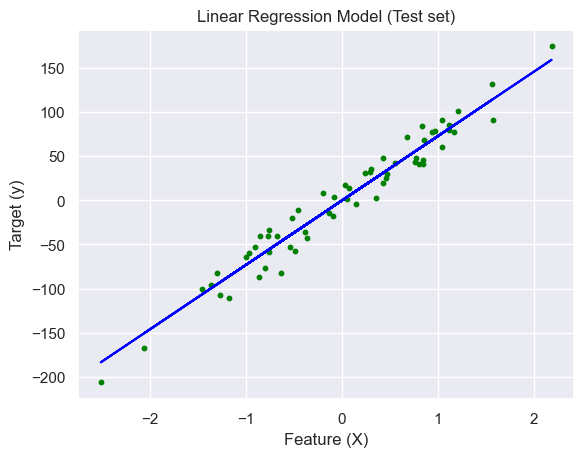

In [540]:
# Visualize the results
plt.scatter(X_test, y_test, s=10, color='green')
plt.plot(X_test, y_pred_test_lin_reg, color='blue')  

plt.title('Linear Regression Model (Test set)')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.grid(True)
plt.show()

#### __Visualize the results (KNN regression)__

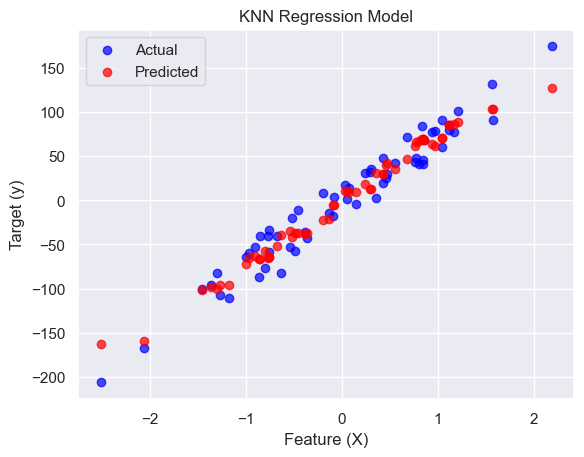

In [545]:
# Visualize the results
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.7)
plt.scatter(X_test, y_pred_test_knn_reg, color='red', label='Predicted', alpha=0.7)

plt.title('KNN Regression Model')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.grid(True)
plt.show()